<h1>Rocks vs. Mines</h1>
This is a practice assignment and the requirements are fairly straightforward. If you find yourself spinning your wheels, you're probably doing something wrong! Use our handwritten digit class example as a reference

<h3>About the data</h3>
The data contains sonar signal data collected after they are bounced off two kinds of objects (underwater). The objects are either rocks or mines and the sonar signals are sent at 60 different frequencies. The value returned is then recorded. The goal of the exercise is to build a model that can figure out whether an object is a rock or a mine


<h2>Get the data</h2>

In [1]:
from sklearn.datasets import fetch_openml
sonar = fetch_openml('sonar')

/Users/alicezhou/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<h2>Organize the data and create training and testing samples</h2>
<li>Use 10% of the data for testing and 90% for training (very little data!)</li>
<li>Rocks should be 1 (positive) and Mines 0 (negative)</li>
<li>X_train,X_test,y_train,y_test</li>

In [2]:
sonar.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
sonar['data']

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [4]:
sonar['target']

0      Rock
1      Rock
2      Rock
3      Rock
4      Rock
       ... 
203    Mine
204    Mine
205    Mine
206    Mine
207    Mine
Name: Class, Length: 208, dtype: category
Categories (2, object): ['Mine', 'Rock']

In [5]:
import pandas as pd
import numpy as np

y = []
for i in sonar['target']:
    if i == 'Rock':
        y.append(1)
    else:
        y.append(0)
y = pd.Series(y)
y

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Length: 208, dtype: int64

In [6]:
X = sonar['data']
df = X.assign(target = y)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.1, random_state = 3456)


In [7]:
X_train = train.drop('target', axis=1)
X_test = test.drop('target', axis=1)
y_train = train['target']
y_test = test['target']

<h2>Fit a logisticregression model</h2>
<li>For this run, don't give any parameters to the model</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html</li>

In [8]:
from sklearn.linear_model import LogisticRegression

#Create a model object. Parameters of the model object are known as hyper parameters
clf = LogisticRegression()

#Fit the data to the model. This estimates the model parameters 
clf.fit(X_train, y_train)

LogisticRegression()

<h2>Calculate precision, recall and accuracy</h2>

In [9]:
from sklearn.metrics import confusion_matrix 
y_test_pred = clf.predict(X_test)
cfm = confusion_matrix(y_test,y_test_pred)
cfm

array([[11,  2],
       [ 1,  7]])

In [10]:
tn, fp, fn, tp = cfm.ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("precision: ", precision) 
print("recall: ",recall) 
print("accuracy: ", accuracy) 
print("\n\n")

precision:  0.7777777777777778
recall:  0.875
accuracy:  0.8571428571428571





<h2>Comment on these numbers</h2>
<li>Keep in mind that, if you need to get across the minefield, you don't want to step on a rock and then discover that it is a mine!</li>
<li>Which statistic should you focus more on, precision or accuracy?</li>
<li>What role will recall play in determining if you have a reasonable model</li>

<h4>Your comment here</h4>

<li> I would focus more on precision, to reduce the risk of stepping on a mine mistakenly. Precision measures the proportion of cases identified as positive that are actually positive. It is the proportion of objects that are identified as rocks and they are really rocks. In this case, if the model predicts a rock but then we discover that it is a mine, it would be very dangerous for workers on minefield. In order to decrease this risk, we should focus more on increasing the model's precision.</li>
</li> However, accuracy measures how accurately the model classifies things as positive or negative. In this case, accuracy cannot specifically measures the risk mentioned above.</li>

<li> Recall is the true positive rate, which is the proportion of positive cases that are correctly identified as positive. It measures how good the model is in identifying a rock. This statistic is valuable because it tells us the model's sensitivity in detecting a rock. However, I think it is less important than precision. Since we want to reduce the risk of stepping on mines, we want the model to correctly identify rocks and rule out the mines.</li> 

<h2>Draw the precision recall curve</h2>

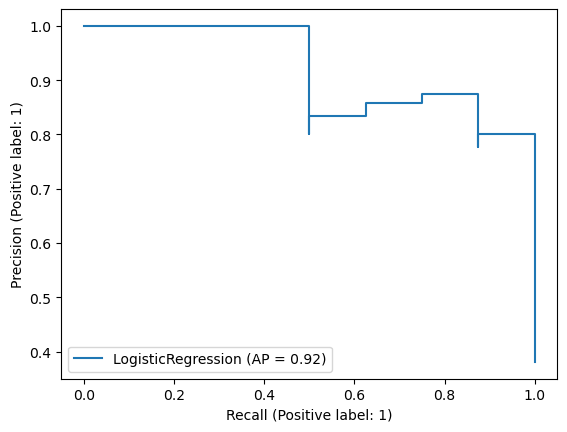

In [11]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)

<h2>Draw the ROC curve</h2>

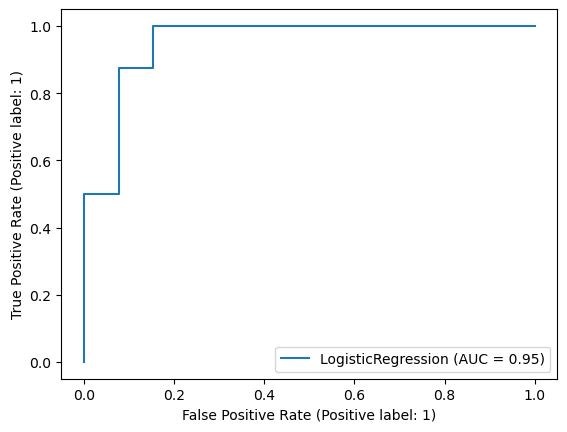

In [12]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test)

<h2>The solver</h2>
Logistic regression is a form of regression used to predict the class a case belongs to. In the case of binomial logistic regression, two classes are predicted (usually classified as 0 and 1 since we're dealing with numbers) and that's what we're using in our rocks and mines example

The actual regression (details at https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) is linear, of course. And linear regression is, in practice, done using one of a number of heuristic algorithms. By default, sklearn uses lbfgs (since you asked: Limited Memory Broyden–Fletcher–Goldfarb–Shanno algorithm). Since we have many independent variables (60, to be precise) another algorithm, liblinear (Library for Large Linear Classification) may be more suitable since it is designed for problems with many independent variables. You can change the algorithm by passing the solver argument to your model. Let's try that and see what we get 

<h2>Fit a new model using liblinear solver</h2>

In [13]:
from sklearn.linear_model import LogisticRegression

#Create a model object. Parameters of the model object are known as hyper parameters
clf_lib = LogisticRegression(solver='liblinear')

#Fit the data to the model. This estimates the model parameters 
clf_lib.fit(X_test, y_test)

LogisticRegression(solver='liblinear')

<h2>Calculate precision, recall, and accuracy</h2>

In [14]:
y_test_pred_lib = clf_lib.predict(X_test)
cfm_lib = confusion_matrix(y_test,y_test_pred_lib)
cfm_lib

tn, fp, fn, tp = cfm_lib.ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("precision: ", precision) 
print("recall: ",recall) 
print("accuracy: ", accuracy) 
print("\n\n")

precision:  0.8333333333333334
recall:  0.625
accuracy:  0.8095238095238095





<h2>Compare these numbers with the earlier numbers</h2>

<h4>Your response here</h4>
<li>After fitting a new model using liblinear solver, precision increases, but recall and accuracy decrease. I think it's a good sign to use liblinear solver. As explained above, we want higher precision to lower the risk of stepping on mines. It could cause a lower recall since precision and recall trade each other off, but precision is a more important statistic than recall here.

<h2>Draw the precision recall and roc curves</h2>

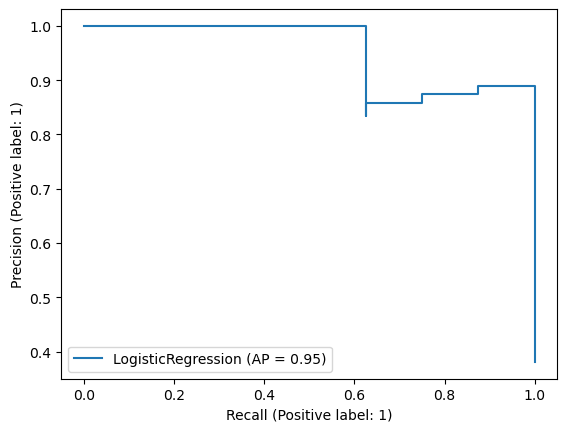

In [15]:
#precision recall curve
PrecisionRecallDisplay.from_estimator(clf_lib, X_test, y_test)

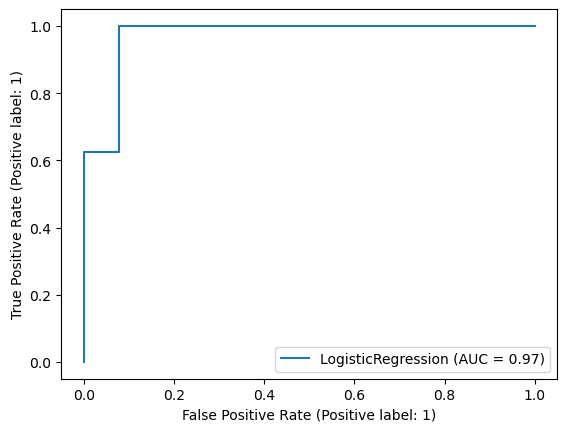

In [16]:
#ROC curve
RocCurveDisplay.from_estimator(clf_lib, X_test, y_test)

<h2>Compare the AP and AUC of the two models</h2>

<h4>Your response here</h4>
<li>After fitting a new model using liblinear solver, both the AP and AUC increase. The higher average precision ("AP") indicates that the model is doing a better job of identifying rocks while minimizing risk of stepping on mines wrongly. It would be helpful to increase the dafety of minefield workers. The higher area under the curve (AUC) tells the higher efficacy of the model. The model works pretty well in separating rocks and mines cases.

<h2>Run a cross validation model</h2>
<li>Try 5 folds on the clf model</li>
<li>Nice, eh?</li>

In [17]:
import numpy as np
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate

clf_c = cross_validate(clf,X_train,y_train,cv=5,return_estimator=True,return_train_score=True)
clf_lib_c = cross_validate(clf_lib,X_train,y_train,cv=5,return_estimator=True,return_train_score=True)

In [18]:
clf_c

{'fit_time': array([0.00397897, 0.00400186, 0.00429893, 0.00351787, 0.00362515]),
 'score_time': array([0.00133204, 0.00116396, 0.00095487, 0.00092697, 0.00093102]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_score': array([0.71052632, 0.81578947, 0.81081081, 0.86486486, 0.72972973]),
 'train_score': array([0.87248322, 0.83221477, 0.84666667, 0.81333333, 0.82      ])}

In [19]:
clf_lib_c

{'fit_time': array([0.00174809, 0.00168705, 0.00167298, 0.0015862 , 0.00165486]),
 'score_time': array([0.00092292, 0.00090289, 0.00090194, 0.00090075, 0.00098515]),
 'estimator': [LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear')],
 'test_score': array([0.63157895, 0.73684211, 0.81081081, 0.89189189, 0.78378378]),
 'train_score': array([0.8590604 , 0.83221477, 0.82666667, 0.79333333, 0.8       ])}